In [ ]:
pip install umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
df = pd.read_csv('/content/설문결과-Raw-Data.csv',sep=',')

In [ ]:
df.columns = ['인식매체','경험','인식','관심도','지식','구성원동의','환경','비용지불의사','정부지원정책','犬성별','중성화','나이','털길이','품종','색상','크기','성격','공고기간','입양희망여부','라이프스타일1','라이프스타일2','조사 나이대','성별','직업','기타직업']
df

,인식매체,경험,인식,관심도,지식,구성원동의,환경,비용지불의사,정부지원정책,犬성별,...,크기,성격,공고기간,입양희망여부,라이프스타일1,라이프스타일2,조사 나이대,성별,직업,기타직업
0,1,1,2,3,4,2,2,5,4,2,...,3,2,4,1,4,1,61,1,3,NaN
1,1,1,4,5,4,4,5,4,4,1,...,4,4,4,2,1,2,26,1,3,NaN
2,1,1,2,4,4,2,2,4,4,1,...,3,2,3,2,3,1,46,1,3,NaN
3,1,2,3,2,2,3,2,2,2,2,...,3,4,4,3,3,1,53,2,6,NaN
4,1,2,3,2,2,3,3,4,4,2,...,3,3,3,2,2,1,41,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,2,3,2,3,3,2,2,4,2,...,3,3,3,2,3,1,30,2,3,NaN
296,1,1,5,5,3,4,4,4,4,2,...,3,3,3,3,3,2,67,2,4,NaN
297,1,1,3,4,4,4,3,4,4,1,...,2,3,3,3,1,3,45,1,3,NaN
298,1,1,2,3,1,2,3,2,1,2,...,1,1,1,3,2,2,43,1,3,NaN


In [ ]:
clean_df = df.drop(['직업','기타직업'], axis = 1) # 라이프 스타일, 나이 등
real_df = clean_df.drop(0,axis=0)


In [ ]:
idx = real_df[real_df["입양희망여부"] == 3].index     #  인덱스의 값이 저장됨
real_df.drop(idx , inplace=True) # 해당 인덱스를 제거함

In [ ]:
old_range = {'입양희망여부' : {2:0}, '성별' : {2:0}} # 0 입양안한다, 1 한다,    성별 - 0 = 여자, 1 = 남자
logi_df = real_df.replace(old_range)

In [ ]:
x = logi_df.drop(['입양희망여부','인식','관심도','지식','정부지원정책','중성화','나이','털길이','품종','색상','크기','성격','공고기간','라이프스타일1','라이프스타일2','조사 나이대','성별'], axis=1)  #변수 지정
y = logi_df['입양희망여부']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
df_num = logi_df.select_dtypes(include=[np.float, np.int])
df_num

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/dev

,인식매체,경험,인식,관심도,지식,구성원동의,환경,비용지불의사,정부지원정책,犬성별,...,품종,색상,크기,성격,공고기간,입양희망여부,라이프스타일1,라이프스타일2,조사 나이대,성별
1,1,1,4,5,4,4,5,4,4,1,...,4,3,4,4,4,0,1,2,26,1
2,1,1,2,4,4,2,2,4,4,1,...,4,3,3,2,3,0,3,1,46,1
4,1,2,3,2,2,3,3,4,4,2,...,4,4,3,3,3,0,2,1,41,0
5,1,1,4,5,4,5,3,5,4,1,...,4,4,2,3,5,1,3,4,29,0
7,1,1,4,5,4,4,4,4,5,1,...,5,3,2,3,4,1,3,4,49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1,1,3,4,4,4,4,5,5,1,...,4,3,4,3,4,1,2,2,52,1
291,1,2,2,3,3,2,2,2,4,1,...,3,3,3,2,3,0,2,1,26,0
292,1,1,2,3,3,4,4,3,3,1,...,5,5,4,3,4,1,2,2,33,1
295,1,2,3,2,3,3,2,2,4,2,...,4,4,3,3,3,0,3,1,30,0


In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn import svm

In [ ]:
X = logi_df.drop(['인식매체','경험','인식','관심도','구성원동의','정부지원정책','중성화','털길이','품종','색상','크기','성격','공고기간','입양희망여부','조사 나이대','성별'], axis=1)  #변수 지정
y = logi_df['입양희망여부']

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


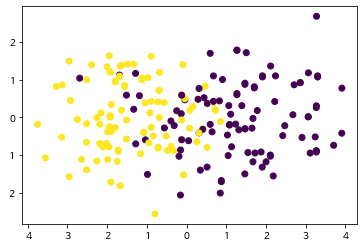

In [ ]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y);

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("Test Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))

Test Accuracy: 90.16%


In [ ]:
n_components = 5

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

In [ ]:
X_train_reduced

,PC1,PC2,PC3,PC4,PC5
239,-0.629448,-0.811844,-0.682911,-0.086532,0.054456
163,-1.624826,-0.814183,-0.158853,0.313573,-0.363815
299,1.526531,0.936632,-0.729503,0.296297,0.082446
248,1.552865,-1.415850,-0.554884,-0.092018,-0.643798
156,-1.484374,0.830432,-0.624551,-0.937604,0.317211
...,...,...,...,...,...
201,-0.145336,0.221755,-1.716151,2.758951,-0.351721
206,0.425968,-0.394500,0.406541,-0.159283,-0.600128
103,0.640154,-0.120704,-2.151546,-1.128504,0.720081
210,-1.842939,0.085144,-0.308669,-0.028556,-0.331047


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_

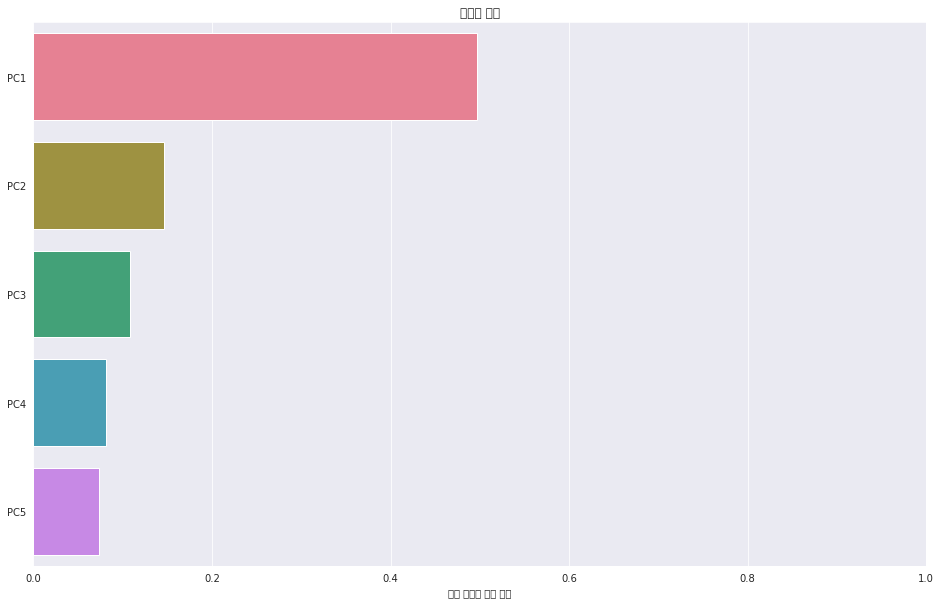

In [ ]:
plt.figure(figsize=(16, 10))
sns.barplot(x=pca.explained_variance_ratio_, y=["PC" + str(i) for i in range(1, n_components + 1)], orient='h', palette='husl')  # 가장 유효한 값 시각화
plt.xlim(0., 1.)
plt.xlabel("원본 데이터 분산 비율")
plt.title("주성분 분산")
plt.show()

In [ ]:
n_components = 2

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

In [ ]:
X_train_reduced

,PC1,PC2
239,-0.629448,-0.811844
163,-1.624826,-0.814183
299,1.526531,0.936632
248,1.552865,-1.415850
156,-1.484374,0.830432
...,...,...
201,-0.145336,0.221755
206,0.425968,-0.394500
103,0.640154,-0.120704
210,-1.842939,0.085144


In [ ]:
plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


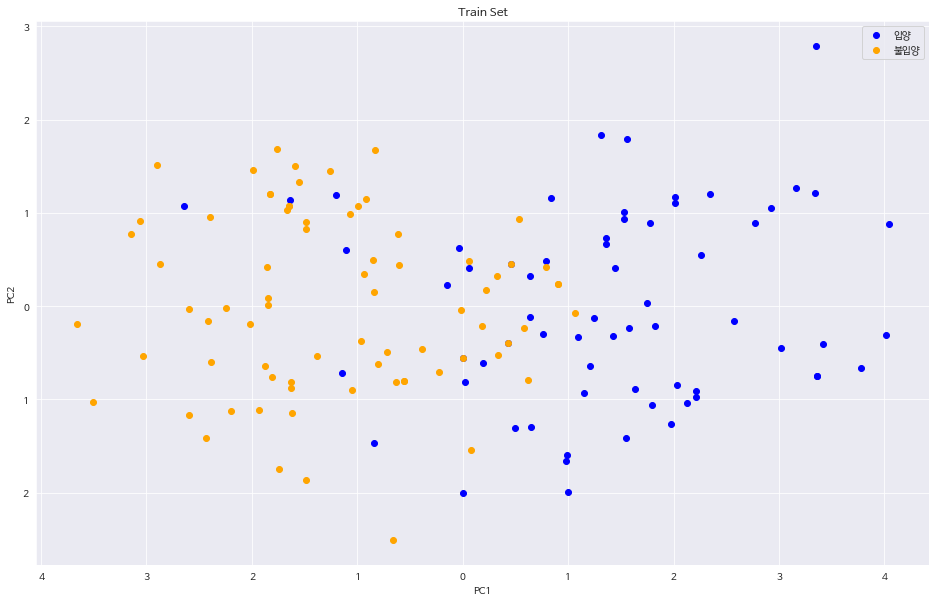

In [ ]:
plt.figure(figsize=(16, 10))
plt.scatter(X_train_reduced.loc[y_train == 0, 'PC1'], X_train_reduced.loc[y_train == 0, 'PC2'], label="입양", color='blue')
plt.scatter(X_train_reduced.loc[y_train == 1, 'PC1'], X_train_reduced.loc[y_train == 1, 'PC2'], label="불입양", color='orange')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Train Set")
plt.legend()
plt.show()

In [ ]:
reduced_model = LogisticRegression()
reduced_model.fit(X_train_reduced, y_train)

print("Test Accuracy ({} Components): {:.2f}%".format(n_components, reduced_model.score(X_test_reduced, y_test) * 100))

Test Accuracy (2 Components): 86.89%


In [ ]:
misclassifications = X_test_reduced.loc[reduced_model.predict(X_test_reduced) != y_test, :]
misclassifications

,PC1,PC2
84,-1.276420,0.264963
53,-1.367355,0.584370
23,-0.314958,0.015069
44,-0.217303,-0.190143
81,-0.181135,0.129964
172,-0.439603,-0.268959
139,-0.099098,-0.952132
161,-0.974829,-0.492734


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


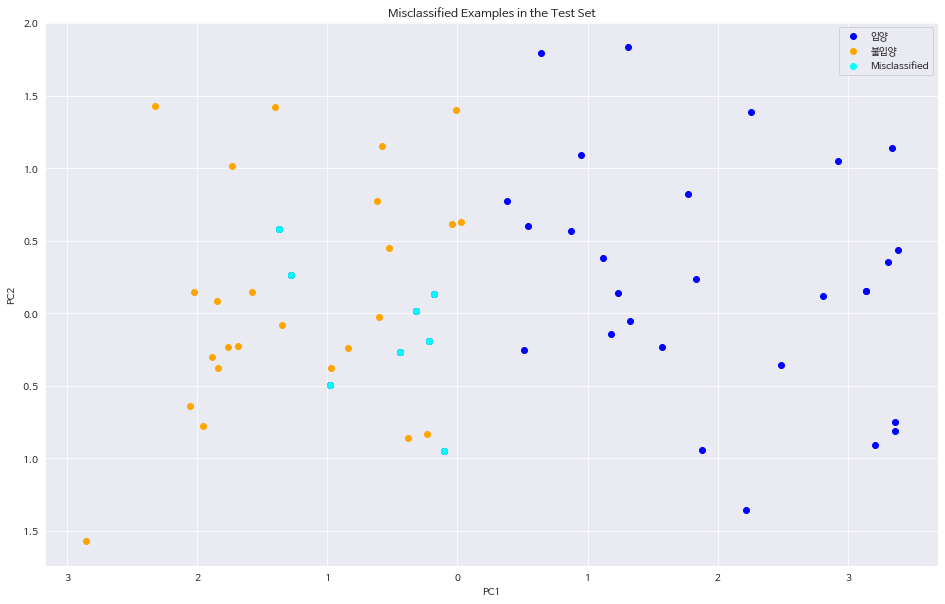

In [ ]:
plt.figure(figsize=(16, 10))
plt.scatter(X_test_reduced.loc[y_test == 0, 'PC1'], X_test_reduced.loc[y_test == 0, 'PC2'], label="입양", color='blue')
plt.scatter(X_test_reduced.loc[y_test == 1, 'PC1'], X_test_reduced.loc[y_test == 1, 'PC2'], label="불입양", color='orange')
plt.scatter(misclassifications['PC1'], misclassifications['PC2'], label="Misclassified", color='cyan')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Misclassified Examples in the Test Set")
plt.legend()
plt.show()